In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
iris_x, iris_y = datasets.load_iris(return_X_y = True, as_frame = True)
iris = iris_x.assign(target=iris_y)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
students = pd.read_csv("students_scores.csv")
students.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [84]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y = True, as_frame = True)
diabetes = diabetes_x.assign(target=diabetes_y)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# EDA Bivariado

Con el analisis univariado es dificil ver como los datos se comportan entre si, y que relaciones tienen, por lo que no suele ser tan util, de aca surge la necesidad de visualizar multiples atributos al tiempo, comenzando por el caso mas simple y comun, entre 2 atributos.
Para esto existen diferentes tipos de visualizaciones que colaboran con este fin.

<AxesSubplot: xlabel='sepal length (cm)', ylabel='Count'>

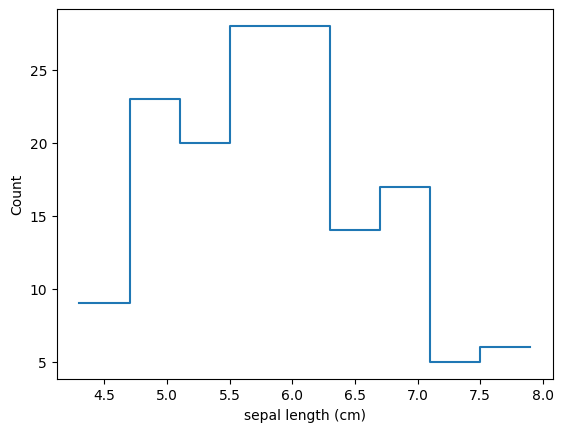

In [5]:
sns.histplot(data=iris, x="sepal length (cm)", element="step", fill=False, cumulative=False)

Los mapas de calor nos permite ver la relacion discreta entre 2 variables, en este caso, la variable al ser numerica no es tan facil identificar como estan organizado los datos, por esta razon una tecnica tambien común es usar el conteo acumulado (joint cumulative distribution function) el cual nos describe si para un valor dado $(i,j)$ se cuenta que valores $X$ son menores que $i$ y cuantos valores $Y$ son menores que $j$, es decir, $i\leq X, j \leq Y$

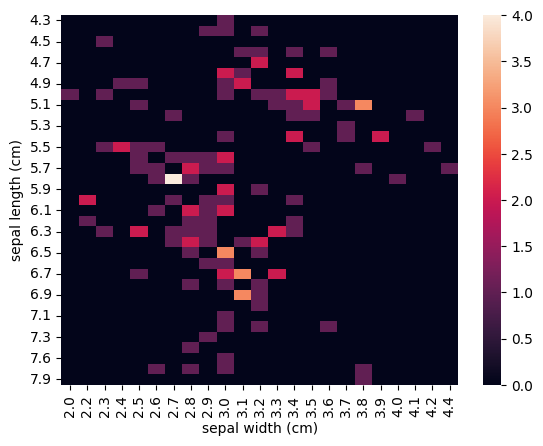

In [51]:
sns.heatmap(pd.crosstab(iris["sepal length (cm)"], iris["sepal width (cm)"]))
#sns.heatmap(pd.crosstab(iris["sepal length (cm)"], iris["sepal width (cm)"]).cumsum(axis=1).cumsum(axis=0)
plt.show()

El heatmap suele ser mas utlizado para comparar variables categoricas, por ejemplo:

<AxesSubplot: xlabel='EthnicGroup', ylabel='ParentEduc'>

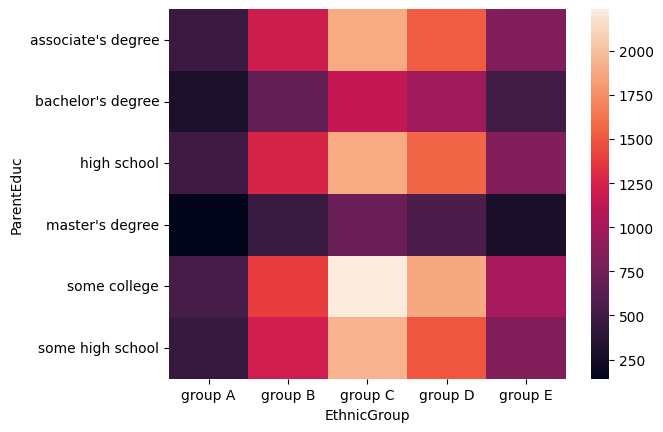

In [15]:
sns.heatmap(pd.crosstab(students["ParentEduc"], students["EthnicGroup"]))
plt.show()

Para ver relaciones entre variables numericas, es mas comun el uso de graficas de puntos

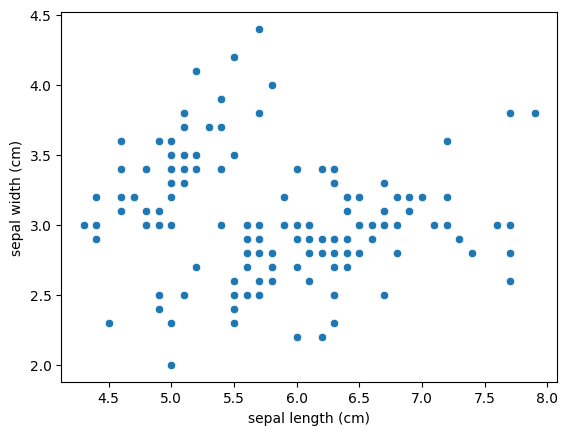

In [58]:
sns.scatterplot(iris, x="sepal length (cm)", y="sepal width (cm)")
plt.show()

Podemos encontrar 2 matrices importante de informacion para nuestras variables numericas, las matrices correlacion y covarianza

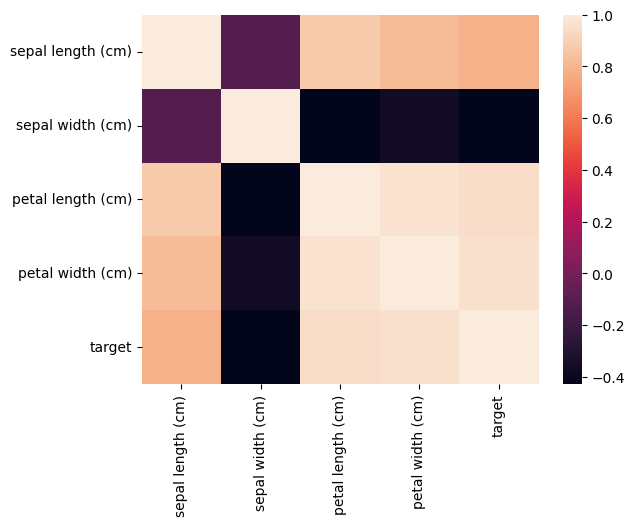

In [60]:
sns.heatmap(iris.corr())
plt.show()

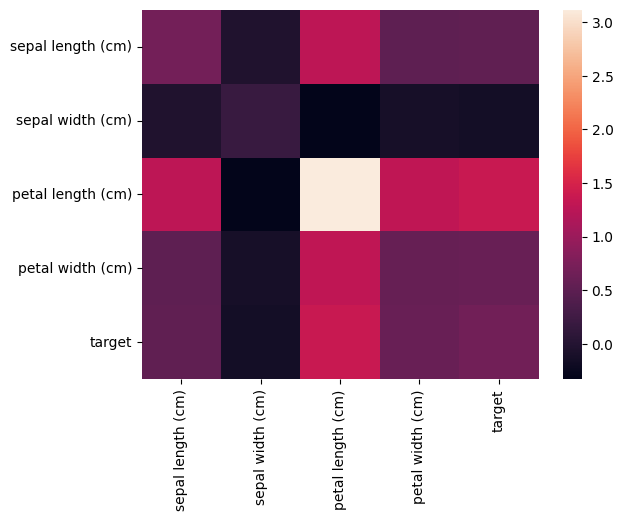

In [61]:
sns.heatmap(iris.cov())
plt.show()

## Con etiquetas

### Numericos para problemas de clasificación
Una grafica de puntos, donde el color indique a que clase pertenece

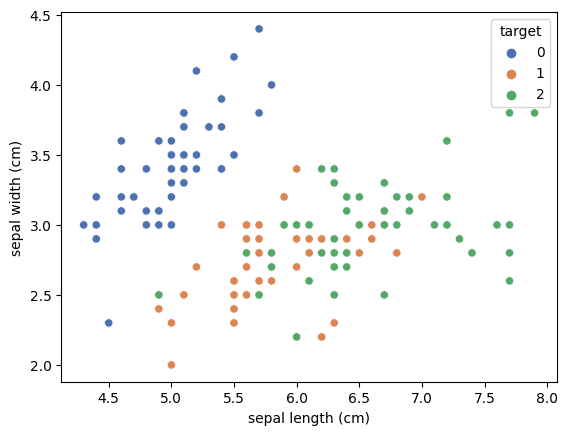

In [72]:
sns.scatterplot(iris, x="sepal length (cm)", y="sepal width (cm)", hue="target", palette="deep")
plt.show()

### Para problemas de regresión
Una grafica de puntos, donde la intensidad del color represente el atributo objetivo

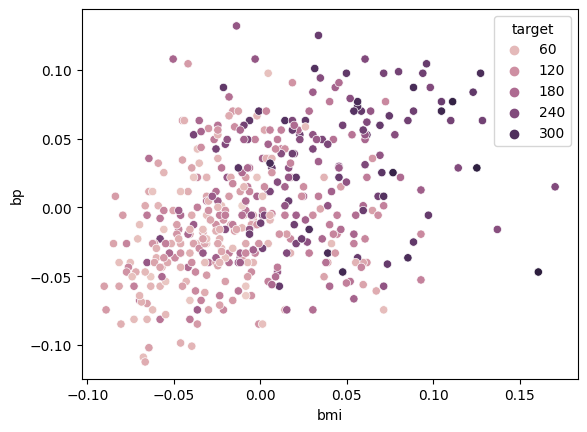

In [97]:
sns.scatterplot(diabetes, x="bmi", y="bp", hue="target")
plt.show()

### Categoricos para problemas de regresion

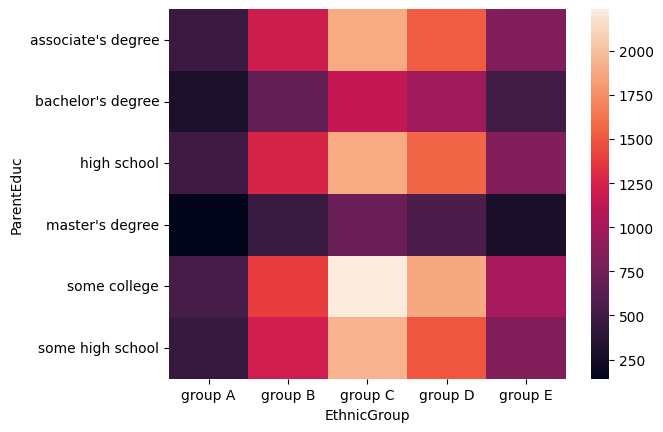

In [98]:
sns.heatmap(pd.crosstab(students["ParentEduc"], students["EthnicGroup"]))
plt.show()